In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Chargement du dataset
df = pd.read_csv('tayara_cars_2_pages.csv')

print("Shape du dataset:", df.shape)
print("\n" + "="*80)
df.head(10)

Shape du dataset: (39, 17)



,titre,prix,kilometrage,couleur_du_vehicule,etat_du_vehicule,boite,annee,cylindree,marque,modele,puissance_fiscale,type_de_carrosserie,carburant,description,url,location,posting_time
0,"Suzuki Celerio, première main",31000.0,53000,Bleu,NaN,Manuelle,2019.0,NaN,Suzuki,Celerio,4.0,Compacte,Essence,"Suzuki Celerio à vendre première main, Faible ...",https://www.tayara.tn/item/voitures/tunis/tuni...,tunis,"12:57, 30/11/2025"
1,Toyota Corolla Dynamic – 2021 – 49 900 km – Ex...,73000.0,49900,Noir,Avec kilométrage,Automatique,2021.0,1.2L,Toyota,Corolla verso,6.0,Compacte,Essence,Je vends ma Toyota Corolla Hatchback – finitio...,https://www.tayara.tn/item/voitures/ariana/la-...,Ariana,"13:34, 28/11/2025"
2,BMW Série 3 F30 316i 2014,NaN,170,Blanc,Nouveau,Manuelle,2014.0,1.6L,BMW,Serie 3 GT,7.0,Berline,Essence,Je mets en vente ma BMW F30 316i (2014) Essenc...,https://www.tayara.tn/item/voitures/ariana/les...,Ariana,"13:34, 27/11/2025"
3,Bmw F30,52500.0,170,Blanc,Avec kilométrage,Manuelle,2014.0,1.6L,BMW,Serie 3,7.0,Berline,Essence,À VENDRE : BMW F30 316i – 2014 (Sport Line) Es...,https://www.tayara.tn/item/voitures/ariana/les...,Ariana,"13:34, 27/11/2025"
4,voiture Peugeot 3008 à vendre,1111.0,2202021,Bleu,Avec kilométrage,Automatique,2021.0,1.2L,Peugeot,3008,7.0,Autres,Essence,"particulier ,je mets une très belle Peugeot 30...",https://www.tayara.tn/item/voitures/nabeul/ham...,Nabeul,"13:34, 27/11/2025"
5,ford titanium sport 1ère main,52000.0,119000,Bleu,Nouveau,Automatique,2021.0,<1.0L,Ford,Super Duty,7.0,Berline,Essence,⛔Possibilité de Vente ou Echange⛔ 📞 Contact🚗 F...,https://www.tayara.tn/item/voitures/ariana/ari...,Ariana,"13:34, 26/11/2025"
6,Kia Koup en parfait état,28000.0,200000,Gris,Avec kilométrage,Manuelle,2010.0,1.6L,Kia,Cerato,7.0,Berline,Essence,NaN,https://www.tayara.tn/item/voitures/ariana/jar...,Ariana,"13:34, 25/11/2025"
7,Porsche Panamera V6 – Série 220 – Année 2010,160000.0,76000,Noir,Avec kilométrage,Automatique,2010.0,3.5L,Porsche,Panamera,20.0,Berline,Essence,📍 Tunis – 78.000 km – Entretien Porsche Détail...,https://www.tayara.tn/item/voitures/tunis/la-m...,Tunis,"13:35, 24/11/2025"
8,hyundai Kona hybride,85000.0,59400,Gris,Avec kilométrage,Manuelle,2022.0,1.6L,Hyundai,Kona,6.0,4 x 4,Hybride essence,Hyundai Kona Hybride – Avril 2022 – 59400 km S...,https://www.tayara.tn/item/voitures/monastir/m...,Monastir,"13:35, 24/11/2025"
9,voiture,37.0,60000,Noir,Avec kilométrage,Manuelle,2019.0,<1.0L,Citroen,C35,4.0,Autres,Essence,voiture Citroën C3 puissance fiscale : 4 CV es...,https://www.tayara.tn/item/voitures/le-kef/taj...,Le Kef,"13:35, 24/11/2025"


In [3]:
# Informations générales sur le dataset
print("Informations sur le dataset:")
print("="*80)
df.info()

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   titre                39 non-null     object 
 1   prix                 25 non-null     float64
 2   kilometrage          39 non-null     int64  
 3   couleur_du_vehicule  38 non-null     object 
 4   etat_du_vehicule     36 non-null     object 
 5   boite                37 non-null     object 
 6   annee                38 non-null     float64
 7   cylindree            34 non-null     object 
 8   marque               38 non-null     object 
 9   modele               38 non-null     object 
 10  puissance_fiscale    34 non-null     float64
 11  type_de_carrosserie  34 non-null     object 
 12  carburant            37 non-null     object 
 13  description          34 non-null     object 
 14  url                  39 non-null     object 
 15  location     

In [7]:
# Statistiques descriptives avec la fonction describe().T
print("Statistiques descriptives:")
print("="*80)
df.describe(include='all')

Statistiques descriptives:


,titre,prix,kilometrage,couleur_du_vehicule,etat_du_vehicule,boite,annee,cylindree,marque,modele,puissance_fiscale,type_de_carrosserie,carburant,description,url,location,posting_time
count,39,25.000000,3.900000e+01,38,36,37,38.000000,34,38,38,34.000000,34,37,34,39,39,39
unique,37,NaN,NaN,7,3,2,NaN,8,20,32,NaN,5,3,32,38,11,21
top,"Suzuki Celerio, première main",NaN,NaN,Blanc,Avec kilométrage,Manuelle,NaN,1.2L,Peugeot,Celerio,NaN,Berline,Essence,"Suzuki Celerio à vendre première main, Faible ...",https://www.tayara.tn/item/voitures/tunis/tuni...,Ariana,"12:35, 30/11/2025"
freq,2,NaN,NaN,11,23,25,NaN,11,5,2,NaN,13,30,2,2,9,7
mean,NaN,42279.960000,1.492141e+05,NaN,NaN,NaN,2225.210526,NaN,NaN,NaN,5.852941,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,35026.110246,3.454338e+05,NaN,NaN,NaN,1278.670639,NaN,NaN,NaN,2.742840,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,22.000000,0.000000e+00,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,28000.000000,4.995000e+04,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,4.250000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,32000.000000,9.000000e+04,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,5.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,57000.000000,1.520000e+05,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Séparation des variables numériques et catégoriques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'prix']

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Variables numériques:")
print(numerical_cols)
print(f"\nNombre de variables numériques: {len(numerical_cols)}")
print("\n" + "="*80)
print("\nVariables catégoriques:")
print(categorical_cols)
print(f"\nNombre de variables catégoriques: {len(categorical_cols)}")

Variables numériques:
['kilometrage', 'annee', 'puissance_fiscale']

Nombre de variables numériques: 3


Variables catégoriques:
['titre', 'couleur_du_vehicule', 'etat_du_vehicule', 'boite', 'cylindree', 'marque', 'modele', 'type_de_carrosserie', 'carburant', 'description', 'url', 'location', 'posting_time']

Nombre de variables catégoriques: 13


In [6]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing_values,
    'Pourcentage': missing_percentage
})

missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values(
    'Valeurs_Manquantes', ascending=False
)

if len(missing_df) > 0:
    print("Valeurs manquantes détectées:")
    print(missing_df)
else:
    print("✓ Aucune valeur manquante détectée dans le dataset!")

Valeurs manquantes détectées:
                     Valeurs_Manquantes  Pourcentage
prix                                 14    35.897436
cylindree                             5    12.820513
puissance_fiscale                     5    12.820513
type_de_carrosserie                   5    12.820513
description                           5    12.820513
etat_du_vehicule                      3     7.692308
boite                                 2     5.128205
carburant                             2     5.128205
couleur_du_vehicule                   1     2.564103
annee                                 1     2.564103
marque                                1     2.564103
modele                                1     2.564103


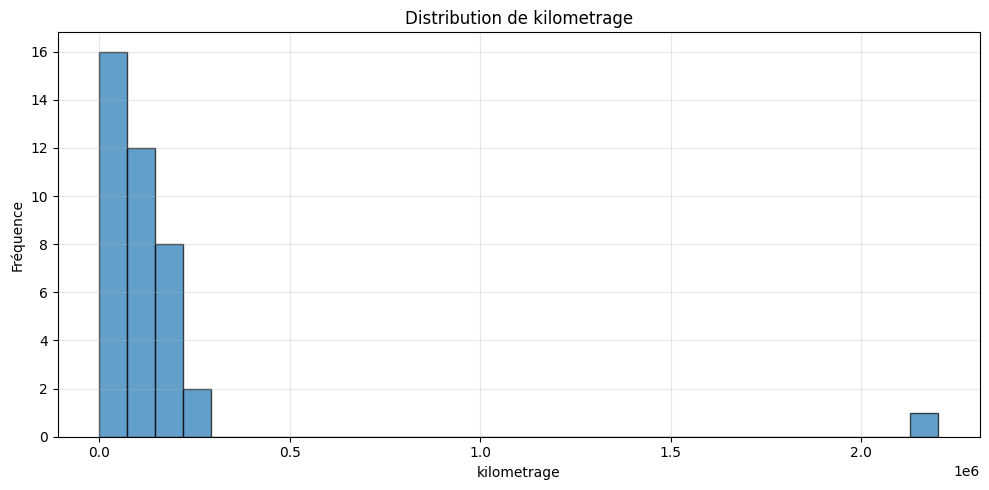

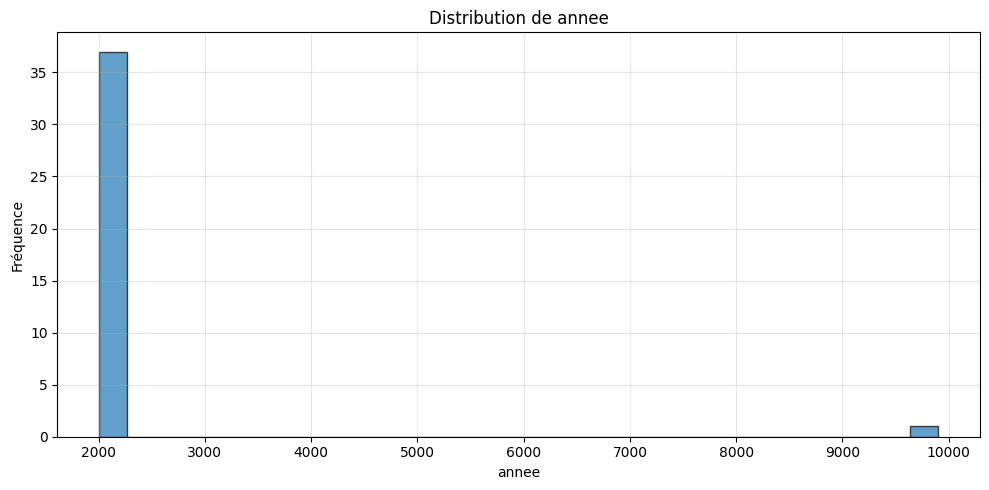

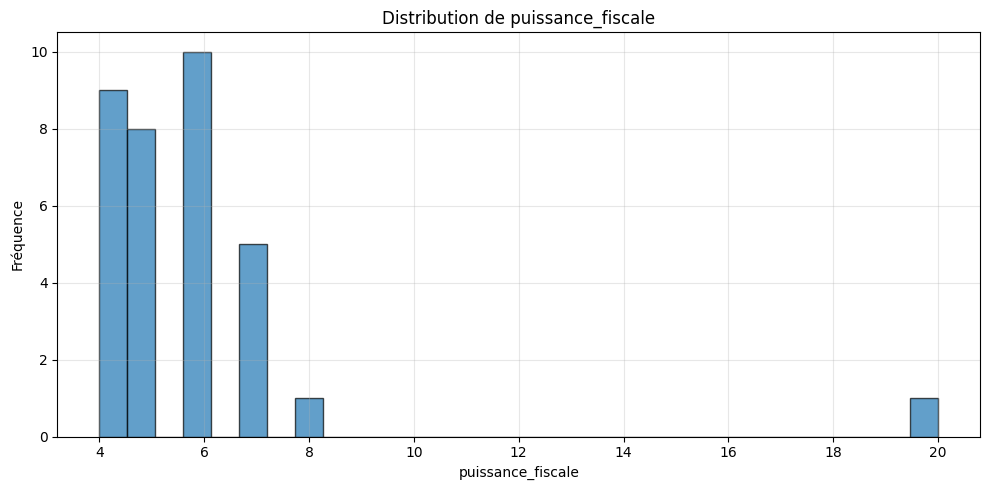


Statistiques des variables numériques:
                   count           mean            std     min       25%  \
kilometrage         39.0  149214.128205  345433.812402     0.0  49950.00   
annee               38.0    2225.210526    1278.670639  2007.0   2016.00   
puissance_fiscale   34.0       5.852941       2.742840     4.0      4.25   

                       50%       75%        max  
kilometrage        90000.0  152000.0  2202021.0  
annee               2019.0    2021.0     9900.0  
puissance_fiscale      5.5       6.0       20.0  


In [14]:
# Distribution des variables numériques
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print(f"\n{'='*80}")
print("Statistiques des variables numériques:")
print(df[numerical_cols].describe().T)

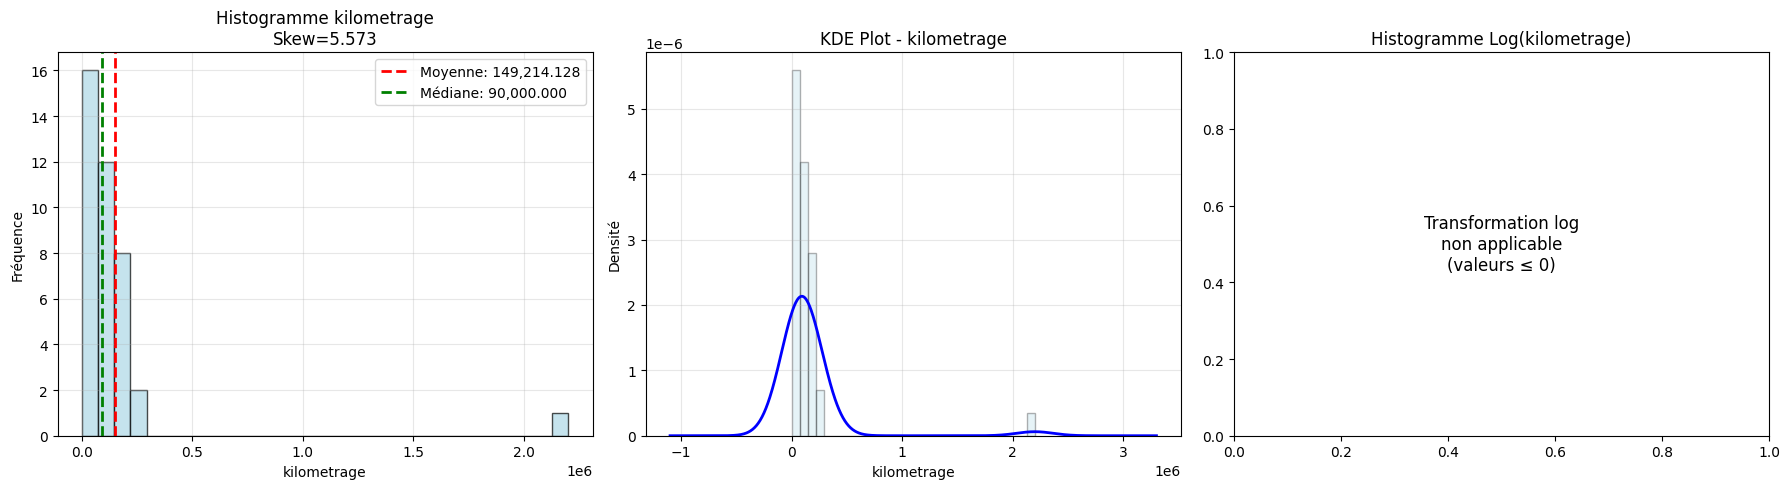


Statistiques pour kilometrage:
  Moyenne: 149,214.128
  Médiane: 90,000.000
  Skewness: 5.573
  Min: 0.000
  Max: 2,202,021.000
  Std: 345,433.812


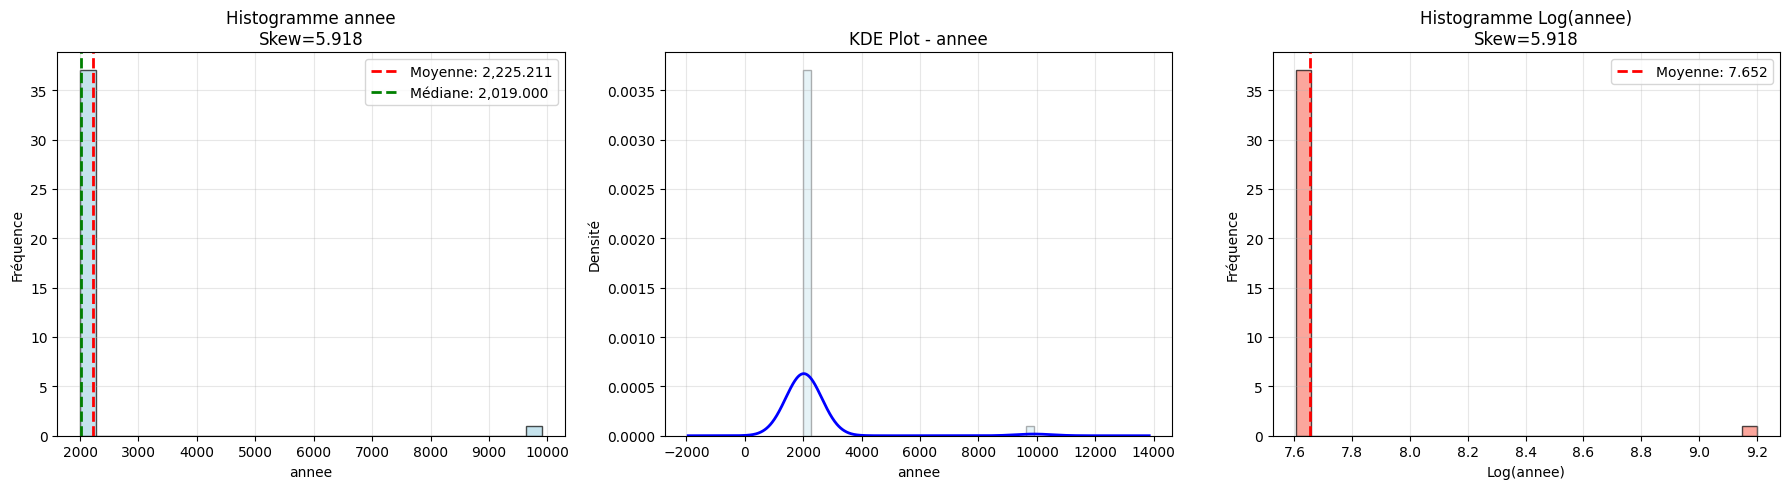


Statistiques pour annee:
  Moyenne: 2,225.211
  Médiane: 2,019.000
  Skewness: 5.918
  Min: 2,007.000
  Max: 9,900.000
  Std: 1,278.671


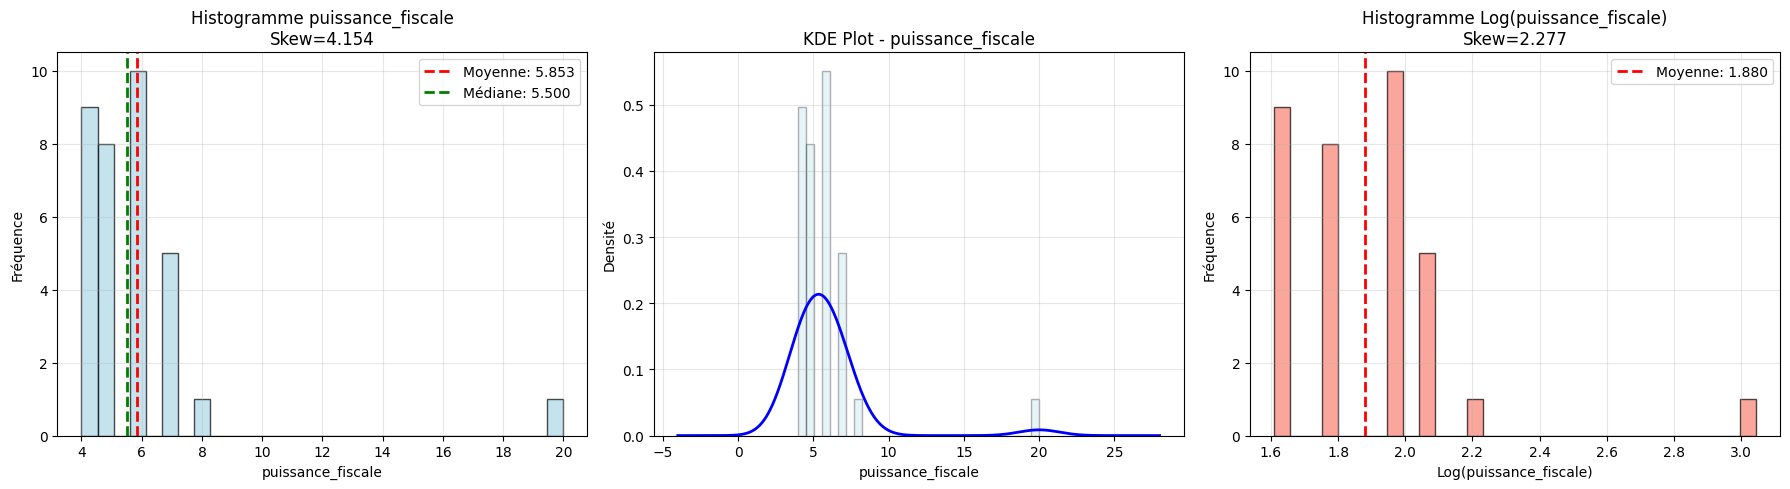


Statistiques pour puissance_fiscale:
  Moyenne: 5.853
  Médiane: 5.500
  Skewness: 4.154
  Min: 4.000
  Max: 20.000
  Std: 2.743


In [16]:
# Distribution détaillée des variables numériques (Histogramme, KDE, Log-transform)
from scipy.stats import skew

for col in numerical_cols:
    data = df[col].dropna()
    
    # Créer une figure avec 3 sous-graphiques
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Calcul des statistiques
    mean_val = data.mean()
    median_val = data.median()
    skew_val = skew(data)
    
    # 1. Histogramme avec moyenne et médiane
    axes[0].hist(data, bins=30, edgecolor='black', alpha=0.7, color='lightblue')
    axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:,.3f}')
    axes[0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:,.3f}')
    axes[0].set_title(f'Histogramme {col}\nSkew={skew_val:.3f}')
    axes[0].set_xlabel(f'{col}')
    axes[0].set_ylabel('Fréquence')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 2. KDE Plot (Kernel Density Estimation)
    axes[1].hist(data, bins=30, density=True, alpha=0.3, edgecolor='black', color='lightblue')
    data.plot(kind='kde', ax=axes[1], linewidth=2, color='blue')
    axes[1].set_title(f'KDE Plot - {col}')
    axes[1].set_xlabel(f'{col}')
    axes[1].set_ylabel('Densité')
    axes[1].grid(True, alpha=0.3)
    
    # 3. Histogramme avec transformation logarithmique (si toutes les valeurs sont positives)
    if (data > 0).all():
        log_data = np.log1p(data)
        log_mean = log_data.mean()
        log_skew = skew(log_data)
        
        axes[2].hist(log_data, bins=30, edgecolor='black', alpha=0.7, color='salmon')
        axes[2].axvline(log_mean, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {log_mean:.3f}')
        axes[2].set_title(f'Histogramme Log({col})\nSkew={log_skew:.3f}')
        axes[2].set_xlabel(f'Log({col})')
        axes[2].set_ylabel('Fréquence')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
    else:
        axes[2].text(0.5, 0.5, 'Transformation log\nnon applicable\n(valeurs ≤ 0)', 
                     ha='center', va='center', fontsize=12)
        axes[2].set_title(f'Histogramme Log({col})')
    
    plt.tight_layout()
    plt.show()
    
    # Afficher les statistiques
    print(f"\n{'='*80}")
    print(f"Statistiques pour {col}:")
    print(f"  Moyenne: {mean_val:,.3f}")
    print(f"  Médiane: {median_val:,.3f}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Min: {data.min():,.3f}")
    print(f"  Max: {data.max():,.3f}")
    print(f"  Std: {data.std():,.3f}")

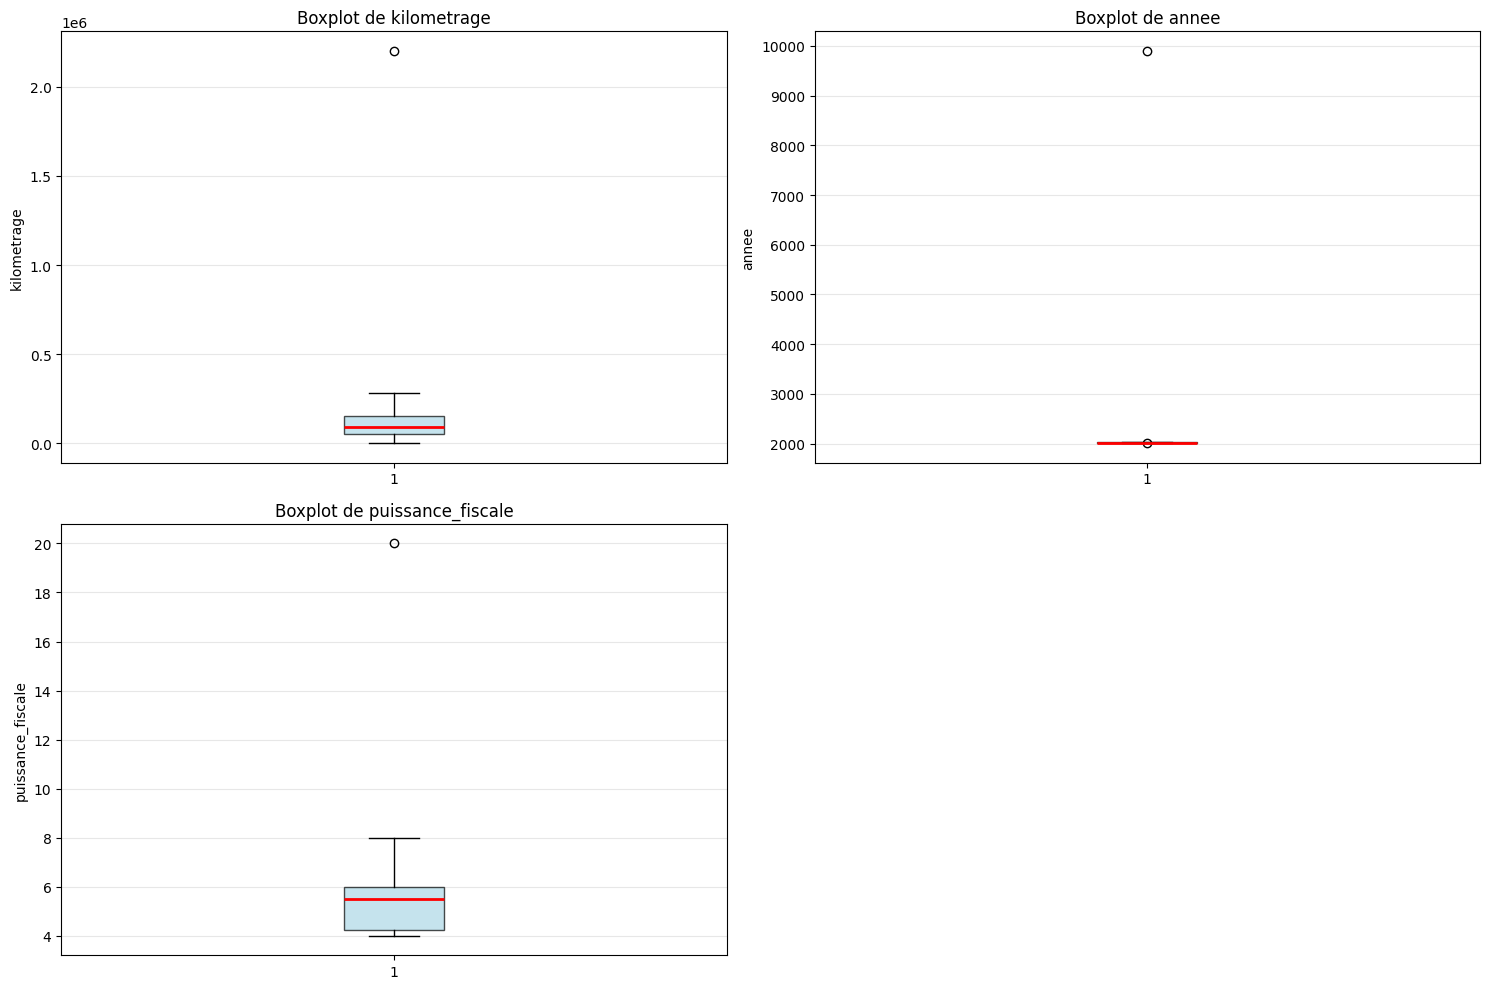

In [9]:
# Boxplots des variables numériques
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

In [ ]:
# Distribution des variables catégoriques
for col in categorical_cols:
    value_counts = df[col].value_counts()
    
    # Limiter à 15 catégories les plus fréquentes si nécessaire
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        title = f'Distribution de {col} (Top 15)'
    else:
        title = f'Distribution de {col}'
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(value_counts)), value_counts.values, alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

# Afficher le nombre de valeurs uniques pour chaque variable catégorique
print(f"\n{'='*80}")
print("Nombre de valeurs uniques par variable catégorique:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count} valeurs uniques")

In [12]:
df.duplicated().sum()

0

In [17]:
# Remplacement des valeurs manquantes numériques par la médiane
print("Traitement des valeurs manquantes numériques...")
print("="*80)

for col in numerical_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"✓ {col}: {missing_count} valeurs manquantes remplacées par la médiane ({median_val:,.3f})")
    else:
        print(f"✓ {col}: Aucune valeur manquante")

print("\n" + "="*80)
print("Vérification après traitement:")
print(f"Valeurs manquantes restantes dans les colonnes numériques: {df[numerical_cols].isnull().sum().sum()}")

Traitement des valeurs manquantes numériques...
✓ kilometrage: Aucune valeur manquante
✓ annee: 1 valeurs manquantes remplacées par la médiane (2,019.000)
✓ puissance_fiscale: 5 valeurs manquantes remplacées par la médiane (5.500)

Vérification après traitement:
Valeurs manquantes restantes dans les colonnes numériques: 0
